In [1]:
import pathlib as pl ; import flopy; import matplotlib.colors as colors ; import matplotlib.pyplot as plt ; import numpy as np
import pandas as pd ; from pathlib import Path ; sim_ws = Path("./002") ; sim_ws.mkdir(exist_ok=True)  

In [2]:
def read_solver_csv():
    fpath = sim_ws / "ims.inner.csv"
    return pd.read_csv(fpath)
ref_data  = Path("E:/15_REPOS/00_BETAMI/bin/Flopy_3099/02b_ref_data_solver") ; name = "solver"  ; processors = None
sim_ws    = Path("./02_RES")   ; sim_ws.mkdir(exist_ok=True)  

In [ ]:
%%capture
sim = flopy.mf6.MFSimulation.load(sim_name=name, sim_ws=ref_data)  ; gwf = sim.get_model() ; print('outer_maximum', sim.ims.outer_maximum)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package npf...
    loading package ic...
    loading package chd...
    loading package ghb...
    loading package rch...
    loading package drn...
    loading package oc...
  loading solution package ngwm...
outer_maximum {internal}
(100)



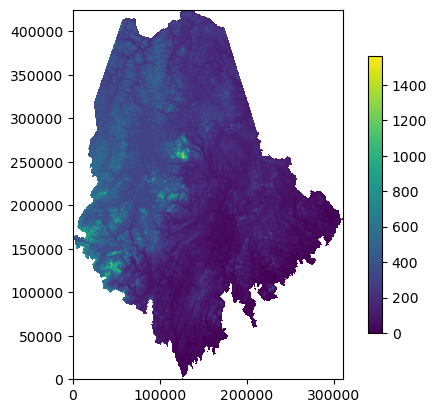

In [4]:
mm = flopy.plot.PlotMapView(model=gwf) ; vv = mm.plot_array(gwf.dis.top.array, masked_values=[2.99999989e30]) ; plt.colorbar(vv, shrink=0.75)

In [7]:
sim.ims.outer_maximum = 5 ; sim.set_sim_path(sim_ws)     ; sim.write_simulation(silent=True)  
# sim.run_simulation(processors=processors, silent=True) ; #df_index = ["base"] ; df = read_solver_csv()  ; df.to_csv(sim_ws/"00_solver.csv")

In [ ]:
df_index

In [ ]:
sim.ims.outer_maximum = 30; 
sim.ims.write() ; sim.run_simulation(processors=processors, silent=True)
df_index.append("max_iter=300")                ; df1 = read_solver_csv() ; df1.to_csv(sim_ws/"01_solver.csv")

In [ ]:
df =df1
fig = plt.figure(figsize=(12,2))  ; plt.plot(df.total_inner_iterations, df.solution_inner_dvmax) ;   plt.gca().set_yscale("symlog")

In [ ]:
sim.ims.outer_maximum = 100 ; sim.ims.under_relaxation = "simple" ; 
sim.ims.write() ; sim.run_simulation(processors=processors, silent=True)
df_index.append("simple")                      ; df2 = read_solver_csv() ; df2.to_csv(sim_ws/"02_solver.csv")

In [ ]:
sim.ims.under_relaxation = "cooley" ; sim.ims.write()                   
sim.run_simulation(processors=processors, silent=True)  
df_index.append("cooley")                      ; df3 = read_solver_csv() ; df3.to_csv(sim_ws/"03_solver.csv")    # under-relaxation

In [ ]:
sim.ims.under_relaxation = "dbd" ; sim.ims.write()                      
sim.run_simulation(processors=processors, silent=True) 
df_index.append("dbd")                         ; df4 = read_solver_csv()  ; df4.to_csv(sim_ws/"04_solver.csv")   # delta-bar-delta under-relaxation

In [ ]:
sim.ims.under_relaxation = "none" ; sim.ims.backtracking_number = 5 
sim.ims.write() ; sim.run_simulation(processors=processors, silent=True)
df_index.append("backtracking")                ; df5 = read_solver_csv()  ; df5.to_csv(sim_ws/"05_solver.csv")

In [ ]:
sim.ims.under_relaxation = "simple" ; sim.ims.backtracking_number = 5  
sim.ims.write() ; sim.run_simulation(processors=processors, silent=True)
df_index.append("backtracking+simple")         ; df6 = read_solver_csv()  ; df6.to_csv(sim_ws/"06_solver.csv")

In [ ]:
fig = plt.figure(figsize=(12,2))  
plt.plot(df1.total_inner_iterations, df1.solution_inner_dvmax) ; plt.gca().set_yscale("symlog")
plt.plot(df2.total_inner_iterations, df2.solution_inner_dvmax) ; plt.gca().set_yscale("symlog")
plt.plot(df3.total_inner_iterations, df3.solution_inner_dvmax) ; plt.gca().set_yscale("symlog")
plt.plot(df4.total_inner_iterations, df4.solution_inner_dvmax) ; plt.gca().set_yscale("symlog")
plt.plot(df5.total_inner_iterations, df5.solution_inner_dvmax) ; plt.gca().set_yscale("symlog")
plt.plot(df6.total_inner_iterations, df6.solution_inner_dvmax) ; plt.gca().set_yscale("symlog")

In [ ]:
df1 ; df1.iloc[-1:].to_csv(sim_ws/"11_df1.csv")

In [ ]:
df_list  = [df, df1, df2, df3, df4, df5, df6]
df_all   = pd.concat ([d.iloc[-1:] for d in df_list], ignore_index=True)               # last line of each one
df_all.drop(columns = ["totim","kstp","kper","ninner","solution_inner_dvmax_model","solution_inner_rmax_model",
                       "solution_inner_alpha","solution_inner_omega"],inplace=True)     ; df_all.to_csv(sim_ws/"12_df_all.csv")

In [ ]:
df_all["simulation"] = df_index                                                         ; df_all.to_csv(sim_ws/"13_df_all.csv")
df_all.insert(0, "converged", True)                                                     ; df_all.to_csv(sim_ws/"14_df_all.csv")  # add column

In [ ]:
df_all.loc[(df_all["nouter"] == 100) | (df_all["nouter"] == 300), "converged"] = False  ; df_all.to_csv(sim_ws/"15_df_all.csv")

In [ ]:
df_all.set_index(keys=["simulation"], inplace=True)                                     ; df_all.to_csv(sim_ws/"16_df_all.csv")